# Import Libs and Dataset

In [103]:
import time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset/Train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


# Cek Categorical Data

# Weather Description

In [3]:
df['weather_description'].value_counts()

weather_description
sky is clear                           7524
mist                                   4047
overcast clouds                        3972
broken clouds                          3379
light rain                             2442
scattered clouds                       2294
Sky is Clear                           1709
few clouds                             1568
light snow                             1280
moderate rain                          1105
haze                                    902
light intensity drizzle                 703
heavy snow                              587
fog                                     567
drizzle                                 460
proximity thunderstorm                  345
heavy intensity rain                    311
snow                                    190
thunderstorm                             66
proximity shower rain                    54
thunderstorm with heavy rain             42
heavy intensity drizzle                  40
thunderstorm

In [4]:
df['weather_description'].value_counts().count()

38

In [5]:
df['weather_type'].value_counts()

weather_type
Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: count, dtype: int64

In [6]:
df['weather_type'].value_counts().count()

11

In [7]:
cat_columns = ['is_holiday', 'weather_type', 'weather_description']

df[cat_columns] = df[cat_columns].apply(lambda x: x.str.lower())

In [8]:
df['weather_description'].value_counts().count()

37

In [9]:
df['weather_type'].value_counts().count()

11

## Is Holiday

In [10]:
df['weather_type'].value_counts()

weather_type
clouds          11213
clear            9233
mist             4047
rain             3940
snow             2070
drizzle          1204
haze              902
fog               567
thunderstorm      553
smoke              17
squall              4
Name: count, dtype: int64

In [11]:
df['is_holiday'].value_counts()

is_holiday
thanksgiving day             5
christmas day                5
new years day                5
columbus day                 4
veterans day                 4
washingtons birthday         4
labor day                    4
memorial day                 3
independence day             3
state fair                   3
martin luther king jr day    3
Name: count, dtype: int64

In [12]:
df['is_holiday'].isnull().sum()

33707

In [13]:
df['is_holiday'].fillna('Not a Holiday', inplace=True)

In [14]:
df['is_holiday'].isnull().sum()

0

# One Hot Encode

Karena masih ada fitur kategorikal, maka diperlukan perlakuan terhadap kolom-kolom tersebut. Pada kali ini saya menggunakan One Hot Encoding dikarenakan unique value yang ada tidak terlalu banyak, sehingga masih memungkinkan jika diperlakukan OHE.

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
encoder = OneHotEncoder(sparse=False)

In [17]:
# Categorical Features
ohe_column = ['is_holiday', 'weather_type', 'weather_description']

In [18]:
encoded_data = encoder.fit_transform(df[ohe_column])

c:\Users\Naufal\anaconda3\envs\XAI\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
encoded_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 60 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   is_holiday_Not a Holiday                                 33750 non-null  float64
 1   is_holiday_christmas day                                 33750 non-null  float64
 2   is_holiday_columbus day                                  33750 non-null  float64
 3   is_holiday_independence day                              33750 non-null  float64
 4   is_holiday_labor day                                     33750 non-null  float64
 5   is_holiday_martin luther king jr day                     33750 non-null  float64
 6   is_holiday_memorial day                                  33750 non-null  float64
 7   is_holiday_new years day                                 33750 non-null  float64
 8   is_holiday_state fair     

Simpan encoder agar dapat digunakan kembali pada pengolahan data lainnya.

In [22]:
import joblib

# Save the encoder to a file so can be used in other files
# joblib.dump(encoder, 'outputs/new_default/oneHotEncoder.joblib')

['outputs/new_default/oneHotEncoder.joblib']

# Concat Encoded Cols to Main df

In [23]:
df_concated = pd.concat([df, df_encoded], axis=1)

In [24]:
df_concated.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

In [25]:
df_concated.info()
df_concated.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 72 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   date_time                                                33750 non-null  object 
 1   air_pollution_index                                      33750 non-null  int64  
 2   humidity                                                 33750 non-null  int64  
 3   wind_speed                                               33750 non-null  int64  
 4   wind_direction                                           33750 non-null  int64  
 5   visibility_in_miles                                      33750 non-null  int64  
 6   dew_point                                                33750 non-null  int64  
 7   temperature                                              33750 non-null  float64
 8   rain_p_h                  

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_smoke,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

In [26]:
df_concated['date_time'] = pd.to_datetime(df_concated['date_time'])

# Extracting date, month, and time
df_concated['day'] = df_concated['date_time'].dt.day
df_concated['month'] = df_concated['date_time'].dt.month
df_concated['hour'] = df_concated['date_time'].dt.hour

In [27]:
# Put Target column to the last column
df_target = df_concated['traffic_volume']
df_concated.drop(columns=['traffic_volume'], inplace=True)
df_concated['traffic_volume'] = df_target

In [28]:
# Display the updated DataFrame
df_concated.info()
df_concated.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   date_time                                                33750 non-null  datetime64[ns]
 1   air_pollution_index                                      33750 non-null  int64         
 2   humidity                                                 33750 non-null  int64         
 3   wind_speed                                               33750 non-null  int64         
 4   wind_direction                                           33750 non-null  int64         
 5   visibility_in_miles                                      33750 non-null  int64         
 6   dew_point                                                33750 non-null  int64         
 7   temperature                                      

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,9,5545
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,10,4516
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,11,4767
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,12,5026
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,13,4918


In [29]:
# df_concated.to_csv('dataset/df_concated.csv', index=False)

# Default Dataset

In [30]:
df_default = df_concated.copy()

In [31]:
# Set the 'datetime_col' as the index of the DataFrame
df_default = df_default.set_index('date_time')

In [32]:
df_default.info()
df_default.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 74 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      33750 non-null  int64  
 1   humidity                                                 33750 non-null  int64  
 2   wind_speed                                               33750 non-null  int64  
 3   wind_direction                                           33750 non-null  int64  
 4   visibility_in_miles                                      33750 non-null  int64  
 5   dew_point                                                33750 non-null  int64  
 6   temperature                                              33750 non-null  float64
 7   rain_p_h                                                 33750 non-null  floa

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,...,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,40,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,9,5545
2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,75,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,10,4516
2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,90,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,11,4767
2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,90,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,12,5026
2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,75,...,0.0,0.0,0.0,0.0,0.0,0.0,2,10,13,4918


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_default)
scaled_data = scaler.transform(df_default)

In [35]:
import joblib

# Save the scaler to a file so can be used in other files
joblib.dump(scaler, 'outputs/new_default/minMaxScaler.joblib')

['outputs/new_default/minMaxScaler.joblib']

In [36]:
df_scaled = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())

In [37]:
df_scaled.index = df_default.index

In [38]:
df_scaled.info()
df_scaled.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 74 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   air_pollution_index                                      33750 non-null  float64
 1   humidity                                                 33750 non-null  float64
 2   wind_speed                                               33750 non-null  float64
 3   wind_direction                                           33750 non-null  float64
 4   visibility_in_miles                                      33750 non-null  float64
 5   dew_point                                                33750 non-null  float64
 6   temperature                                              33750 non-null  float64
 7   rain_p_h                                                 33750 non-null  floa

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,...,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day,month,hour,traffic_volume
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,0.384083,0.873563,0.1250,0.913889,0.000,0.000,0.935245,0.0,0.0,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.391304,0.761676
2012-10-02 10:00:00,0.581315,0.620690,0.1875,0.916667,0.000,0.000,0.938749,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.434783,0.620330
2012-10-02 11:00:00,0.356401,0.609195,0.1875,0.913889,0.125,0.125,0.939463,0.0,0.0,0.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.478261,0.654808
2012-10-02 12:00:00,0.034602,0.609195,0.1875,0.913889,0.500,0.500,0.941247,0.0,0.0,0.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.521739,0.690385
2012-10-02 13:00:00,0.937716,0.597701,0.1875,0.913889,0.750,0.750,0.944524,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.818182,0.565217,0.675549


# Reshape to fit RNN needs

In [49]:
trainX = []
trainY = []

In [50]:
n_future = 1   # Number of data we want to look into the future based on the past data.
n_past = 24  # Number of past data we want to use to predict the future.

In [51]:
for i in range(n_past, len(scaled_data) - n_future +1):
    trainX.append(scaled_data[i - n_past:i, 0:df_scaled.shape[1]])
    trainY.append(scaled_data[i + n_future - 1:i + n_future, -1])

trainX, trainY = np.array(trainX), np.array(trainY)

In [52]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (33726, 24, 74).
trainY shape == (33726, 1).


In [53]:
np.save('outputs/new_default/default_train_x.npy', trainX)
np.save('outputs/new_default/default_train_y.npy', trainY)

# Baseline Model

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [55]:
total_samples = trainX.shape[0]
split_index = int(total_samples * 0.9)

X_train = trainX[:split_index]
y_train = trainY[:split_index]
X_test = trainX[split_index:]
y_test = trainY[split_index:]

In [56]:
print(f'X_train length == {len(X_train)}')
print(f'X_test length == {len(X_test)}')

X_train length == 30353
X_test length == 3373


In [59]:
true_value = df['traffic_volume'][split_index+n_past:].values

## LSTM

In [57]:
model_LSTM = Sequential ([
    LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(trainY.shape[1])
])

model_LSTM.compile(optimizer='adam', loss='mae')
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 24, 64)            35584     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 48033 (187.63 KB)
Trainable params: 48033 (187.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
1708/1708 [==============================] - 22s 13ms/step - loss: 0.0512 - val_loss: 0.0388
Epoch 2/50
1708/1708 [==============================] - 22s 13ms/step - loss: 0.0510 - val_loss: 0.0385
Epoch 3/50
1708/1708 [==============================] - 21s 12ms/step - loss: 0.0510 - val_loss: 0.0366
Epoch 4/50
1708/1708 [==============================] - 23s 14ms/step - loss: 0.0506 - val_loss: 0.0387
Epoch 5/50
1708/1708 [==============================] - 22s 13ms/step - loss: 0.0503 - val_loss: 0.0384
Epoch 6/50
1708/1708 [==============================] - 20s 12ms/step - loss: 0.0506 - val_loss: 0.0406
Epoch 7/50
1708/1708 [==============================] - 20s 12ms/step - loss: 0.0505 - val_loss: 0.0391
Epoch 8/50
1708/1708 [==============================] - 20s 12ms/step - loss: 0.0501 - val_loss: 0.0382
Epoch 9/50
1708/1708 [==============================] - 22s 13ms/step - loss: 0.0500 - val_loss: 0.0377
Epoch 10/50
1708/1708 [==============================] - 26s 15m

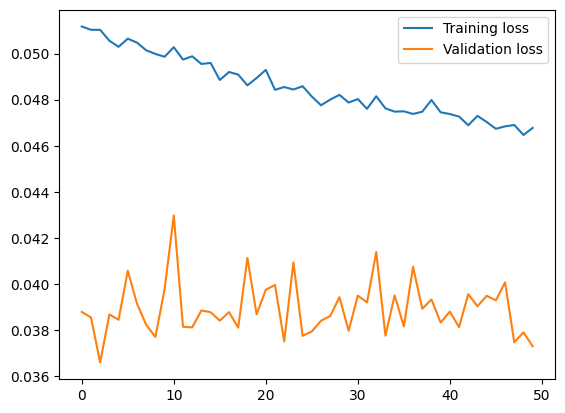

In [133]:
# fit the model
start_time = time.time()
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)
end_time = time.time()
training_time_LSTM = end_time - start_time
plt.plot(history_LSTM.history['loss'], label='Training loss')
plt.plot(history_LSTM.history['val_loss'], label='Validation loss')
plt.legend()

In [134]:
prediction_LSTM = model_LSTM.predict(X_test)

106/106 [==============================] - 1s 6ms/step


In [135]:
prediction_copies = np.repeat(prediction_LSTM, df_default.shape[1], axis=-1)
pred_LSTM_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

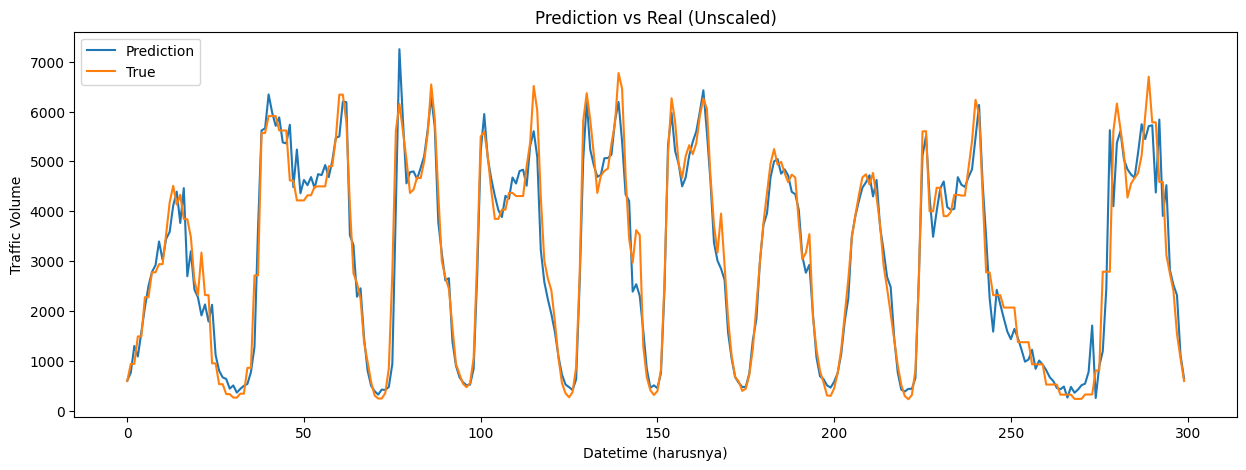

In [136]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_LSTM_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [137]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import math


mae_LSTM = mean_absolute_error(pred_LSTM_unscaled, true_value)
rmse_LSTM = math.sqrt(mean_squared_error(pred_LSTM_unscaled, true_value))
mape_LSTM = mean_absolute_percentage_error(pred_LSTM_unscaled, true_value)

print(f'MAE : {mae_LSTM}')
print(f'RMSE: {rmse_LSTM}')
print(f'MAPE: {mape_LSTM}')
print(f'Time: {training_time_LSTM}')

MAE : 310.1814073686461
RMSE: 501.8834580709047
MAPE: 0.1479121696661796
Time: 1037.1352951526642


In [157]:
type(model_LSTM)

keras.src.engine.sequential.Sequential

## BiLSTM

In [138]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

model_BiLSTM = Sequential([
    Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(trainX.shape[1], trainX.shape[2])),
    Bidirectional(LSTM(32, activation='relu', return_sequences=False)),
    Dropout(0.2),
    Dense(trainY.shape[1])
])

model_BiLSTM.compile(optimizer='adam', loss='mae')
model_BiLSTM.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 24, 128)           71168     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 112449 (439.25 KB)
Trainable params: 112449 (439.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
1708/1708 [==============================] - 29s 17ms/step - loss: 0.0965 - val_loss: 0.0506
Epoch 2/50
1708/1708 [==============================] - 25s 14ms/step - loss: 0.0719 - val_loss: 0.0590
Epoch 3/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0655 - val_loss: 0.0510
Epoch 4/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0626 - val_loss: 0.0499
Epoch 5/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0596 - val_loss: 0.0420
Epoch 6/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0583 - val_loss: 0.0448
Epoch 7/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0575 - val_loss: 0.0391
Epoch 8/50
1708/1708 [==============================] - 25s 15ms/step - loss: 0.0562 - val_loss: 0.0437
Epoch 9/50
1708/1708 [==============================] - 30s 18ms/step - loss: 0.0553 - val_loss: 0.0421
Epoch 10/50
1708/1708 [==============================] - 34s 20m

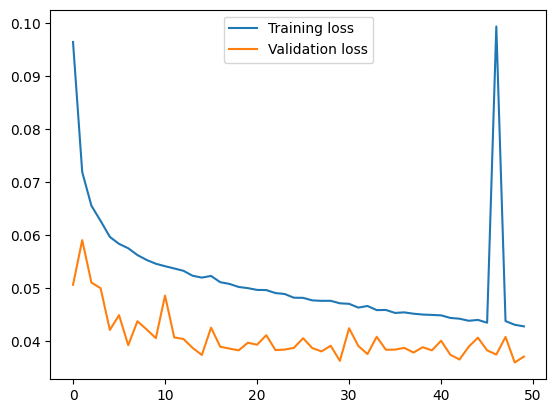

In [140]:
# fit the model
start_time = time.time()
history_BiLSTM = model_BiLSTM.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)
end_time = time.time()
training_time_BiLSTM = end_time - start_time

plt.plot(history_BiLSTM.history['loss'], label='Training loss')
plt.plot(history_BiLSTM.history['val_loss'], label='Validation loss')
plt.legend()

In [141]:
prediction_BiLSTM = model_BiLSTM.predict(X_test)

106/106 [==============================] - 1s 7ms/step


In [142]:
prediction_copies = np.repeat(prediction_BiLSTM, df_default.shape[1], axis=-1)
pred_BiLSTM_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

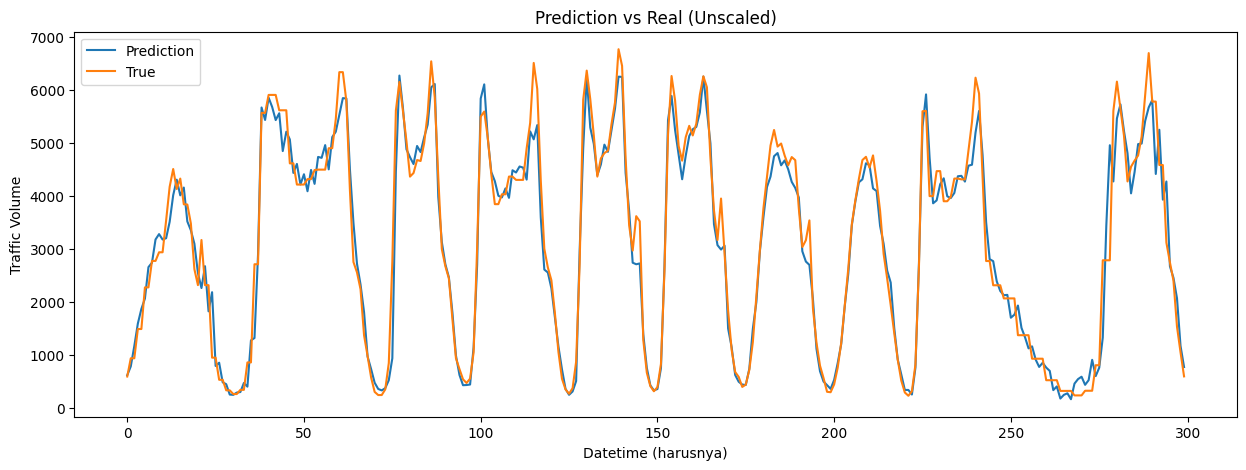

In [143]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_BiLSTM_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [144]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import math


mae_BiLSTM = mean_absolute_error(pred_BiLSTM_unscaled, true_value)
rmse_BiLSTM = math.sqrt(mean_squared_error(pred_BiLSTM_unscaled, true_value))
mape_BiLSTM = mean_absolute_percentage_error(pred_BiLSTM_unscaled, true_value)

print(f'MAE : {mae_BiLSTM}')
print(f'RMSE: {rmse_BiLSTM}')
print(f'MAPE: {mape_BiLSTM}')
print(f'Time: {training_time_BiLSTM}')

MAE : 289.198055243584
RMSE: 469.45241829080175
MAPE: 0.13822556413786483
Time: 1450.7482154369354


## GRU

In [145]:
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.models import Sequential

model_GRU = Sequential([
    GRU(64, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])),
    GRU(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(trainY.shape[1])
])

model_GRU.compile(optimizer='adam', loss='mae')
model_GRU.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 64)            26880     
                                                                 
 gru_5 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 36321 (141.88 KB)
Trainable params: 36321 (141.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
1708/1708 [==============================] - 27s 12ms/step - loss: 0.0971 - val_loss: 0.0541
Epoch 2/50
1708/1708 [==============================] - 21s 12ms/step - loss: 0.0735 - val_loss: 0.0600
Epoch 3/50
1708/1708 [==============================] - 20s 12ms/step - loss: 0.0688 - val_loss: 0.0443
Epoch 4/50
1708/1708 [==============================] - 19s 11ms/step - loss: 0.0665 - val_loss: 0.0454
Epoch 5/50
1708/1708 [==============================] - 20s 12ms/step - loss: 0.0648 - val_loss: 0.0423
Epoch 6/50
1708/1708 [==============================] - 20s 12ms/step - loss: 0.0634 - val_loss: 0.0422
Epoch 7/50
1708/1708 [==============================] - 20s 11ms/step - loss: 0.0630 - val_loss: 0.0407
Epoch 8/50
1708/1708 [==============================] - 20s 11ms/step - loss: 0.0613 - val_loss: 0.0419
Epoch 9/50
1708/1708 [==============================] - 20s 12ms/step - loss: 0.0608 - val_loss: 0.0430
Epoch 10/50
1708/1708 [==============================] - 20s 12m

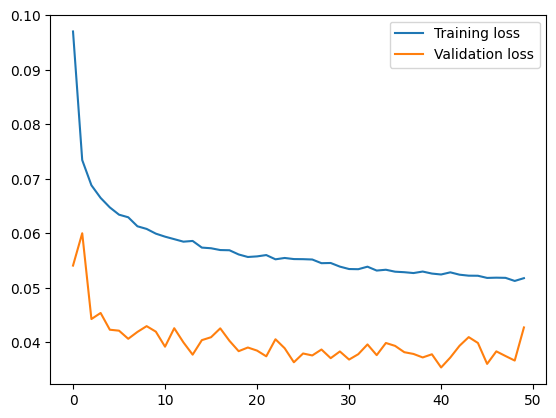

In [146]:
# fit the model
start_time = time.time()
history_GRU = model_GRU.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)
end_time = time.time()
training_time_GRU = end_time - start_time

plt.plot(history_GRU.history['loss'], label='Training loss')
plt.plot(history_GRU.history['val_loss'], label='Validation loss')
plt.legend()

In [147]:
prediction_GRU = model_GRU.predict(X_test)

106/106 [==============================] - 1s 5ms/step


In [148]:
prediction_copies = np.repeat(prediction_GRU, df_default.shape[1], axis=-1)
pred_GRU_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

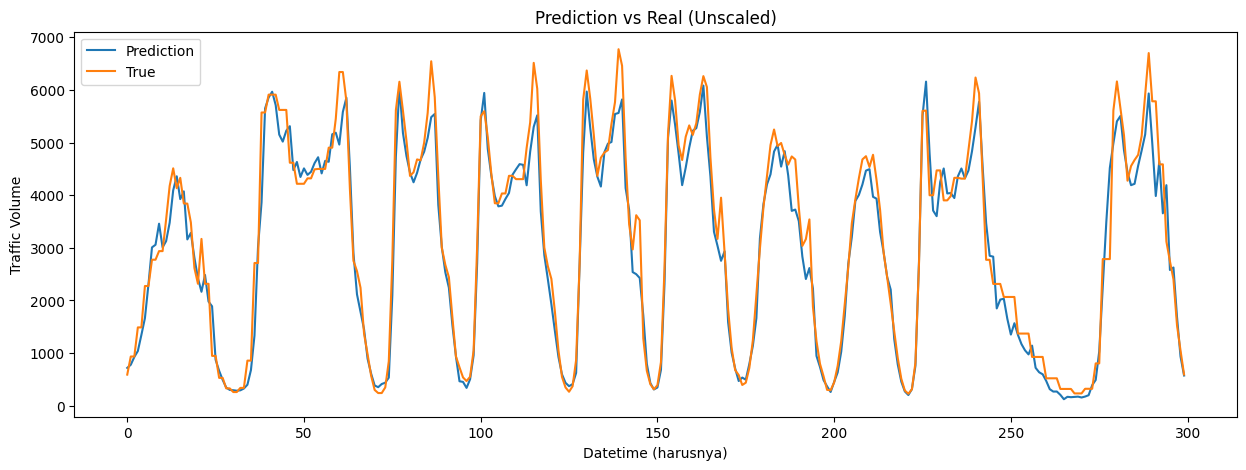

In [149]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_GRU_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [150]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import math


mae_GRU = mean_absolute_error(pred_GRU_unscaled, true_value)
rmse_GRU = math.sqrt(mean_squared_error(pred_GRU_unscaled, true_value))
mape_GRU = mean_absolute_percentage_error(pred_GRU_unscaled, true_value)

print(f'MAE : {mae_GRU}')
print(f'RMSE: {rmse_GRU}')
print(f'MAPE: {mape_GRU}')
print(f'Time: {training_time_GRU}')

MAE : 355.2013139699285
RMSE: 528.73800085206
MAPE: 0.16276803726724393
Time: 1008.0321476459503


## Comparison

In [151]:
data_LSTM = {'Model': 'LSTM', 'MAE': mae_LSTM, 'RMSE': rmse_LSTM, 'MAPE': mape_LSTM, 'Time': training_time_LSTM}
data_BiLSTM = {'Model': 'BiLSTM', 'MAE': mae_BiLSTM, 'RMSE': rmse_BiLSTM, 'MAPE': mape_BiLSTM, 'Time': training_time_BiLSTM}
data_GRU = {'Model': 'GRU', 'MAE': mae_GRU, 'RMSE': rmse_GRU, 'MAPE': mape_GRU, 'Time': training_time_GRU}

df_metrics = pd.DataFrame([data_LSTM, data_BiLSTM, data_GRU])

In [152]:
df_metrics

,Model,MAE,RMSE,MAPE,Time
0,LSTM,310.181407,501.883458,0.147912,1037.135295
1,BiLSTM,289.198055,469.452418,0.138226,1450.748215
2,GRU,355.201314,528.738001,0.162768,1008.032148


In [99]:
# model_LSTM.save('outputs/new_default//Baseline/LSTM_default.h5')
# model_BiLSTM.save('outputs/new_default//Baseline/BiLSTM_default.h5')
# model_GRU.save('outputs/new_default//Baseline/GRU_default.h5')

c:\Users\Naufal\anaconda3\envs\XAI\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Tuned Model

## LSTM

In [100]:
from kerastuner.tuners import RandomSearch

def build_model_LSTM(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units_layer1', min_value=32, max_value=128, step=32),
                   activation=hp.Choice('activation', values=['relu', 'tanh']),
                   input_shape=(trainX.shape[1], trainX.shape[2]),
                   return_sequences=True))
    model.add(LSTM(hp.Int('units_layer2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='mae')
    return model


C:\Users\Naufal\AppData\Local\Temp\ipykernel_2224\207269757.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [101]:
tuner_LSTM = RandomSearch(
    build_model_LSTM,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='model/LSTM_default',
    project_name='LSTM_tuning_default'
)

tuner_LSTM.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
 

Reloading Tuner from model/LSTM_default\LSTM_tuning_default\tuner0.json


In [102]:
# Get the optimal hyperparameters
best_hps_LSTM = tuner_LSTM.get_best_hyperparameters(num_trials=1)[0]

for param in best_hps_LSTM.values:
    print(param, best_hps_LSTM.get(param))

units_layer1 32
activation tanh
units_layer2 64
dropout 0.30000000000000004
optimizer adam


In [153]:
# Build the model with the best hyperparameters
model_LSTM_tuned = tuner_LSTM.hypermodel.build(best_hps_LSTM)
start_time = time.time()
history_LSTM_tuned = model_LSTM_tuned.fit(trainX, trainY, epochs=50, validation_data=(X_test, y_test))
end_time = time.time()
training_time_LSTM_tuned = end_time - start_time

Epoch 1/50
1054/1054 [==============================] - 21s 16ms/step - loss: 0.1243 - val_loss: 0.0600
Epoch 2/50
1054/1054 [==============================] - 16s 15ms/step - loss: 0.0722 - val_loss: 0.0505
Epoch 3/50
1054/1054 [==============================] - 16s 15ms/step - loss: 0.0653 - val_loss: 0.0493
Epoch 4/50
1054/1054 [==============================] - 16s 15ms/step - loss: 0.0629 - val_loss: 0.0459
Epoch 5/50
1054/1054 [==============================] - 16s 15ms/step - loss: 0.0603 - val_loss: 0.0428
Epoch 6/50
1054/1054 [==============================] - 16s 15ms/step - loss: 0.0590 - val_loss: 0.0406
Epoch 7/50
1054/1054 [==============================] - 16s 16ms/step - loss: 0.0576 - val_loss: 0.0424
Epoch 8/50
1054/1054 [==============================] - 16s 15ms/step - loss: 0.0567 - val_loss: 0.0387
Epoch 9/50
1054/1054 [==============================] - 16s 15ms/step - loss: 0.0559 - val_loss: 0.0443
Epoch 10/50
1054/1054 [==============================] - 16s 15m

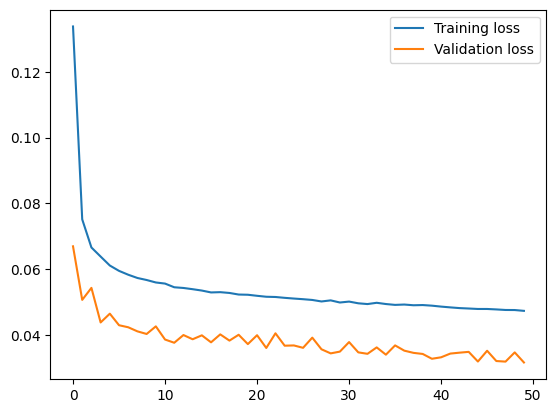

In [105]:
plt.plot(history_LSTM_tuned.history['loss'], label='Training loss')
plt.plot(history_LSTM_tuned.history['val_loss'], label='Validation loss')
plt.legend()

In [106]:
pred_LSTM_tuned = model_LSTM_tuned.predict(X_test)

106/106 [==============================] - 2s 10ms/step


In [107]:
prediction_copies = np.repeat(pred_LSTM_tuned, df_default.shape[1], axis=-1)
pred_LSTM_tuned_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

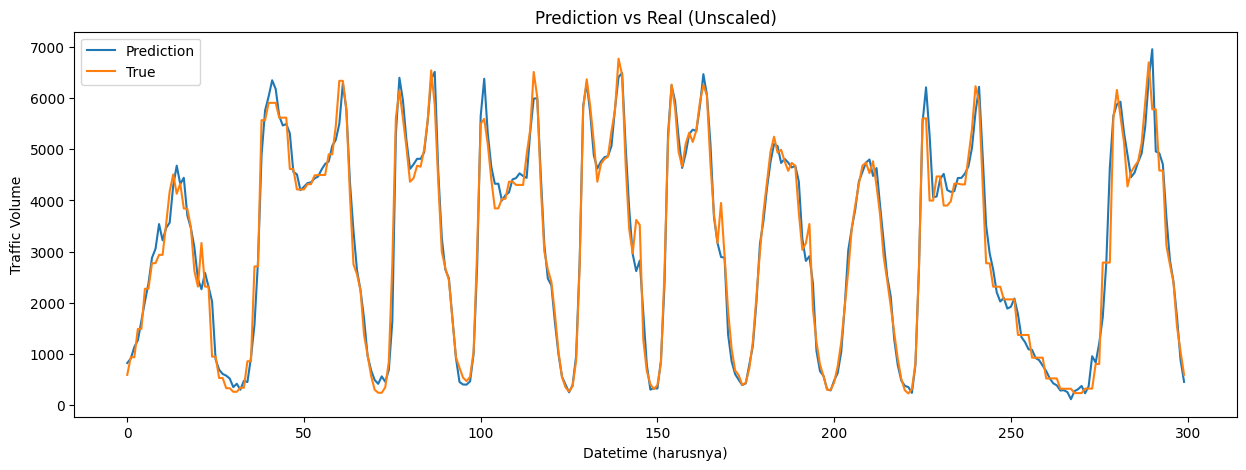

In [108]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_LSTM_tuned_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import math


mae_LSTM_tuned = mean_absolute_error(pred_LSTM_tuned_unscaled, true_value)
rmse_LSTM_tuned = math.sqrt(mean_squared_error(pred_LSTM_tuned_unscaled, true_value))
mape_LSTM_tuned = mean_absolute_percentage_error(pred_LSTM_tuned_unscaled, true_value)

print(f'MAE : {mae_LSTM_tuned}')
print(f'RMSE: {rmse_LSTM_tuned}')
print(f'MAPE: {mape_LSTM_tuned}')
print(f'Time: {training_time_LSTM}')

MAE : 229.94535775075778
RMSE: 379.13219821297736
MAPE: 0.12060121438984149
Time: 925.277336359024


In [76]:
# model_LSTM_tuned.save('model/Tuned/LSTM_default.h5')

c:\Users\Naufal\anaconda3\envs\XAI\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## BiLSTM

In [110]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

In [111]:
from kerastuner.tuners import RandomSearch

def build_model_BiLSTM(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('units_layer1', min_value=32, max_value=128, step=32),
                                activation=hp.Choice('activation', values=['relu', 'tanh']),
                                input_shape=(trainX.shape[1], trainX.shape[2]),
                                return_sequences=True)))
    model.add(Bidirectional(LSTM(hp.Int('units_layer2', min_value=16, max_value=64, step=16), activation='relu')))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='mae')
    return model

In [112]:
tuner_BiLSTM = RandomSearch(
    build_model_BiLSTM,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='model/BiLSTM_default',
    project_name='BiLSTM_tuning_default'
)

tuner_BiLSTM.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Reloading Tuner from model/BiLSTM_default\BiLSTM_tuning_default\tuner0.json


In [113]:
# Get the optimal hyperparameters
best_hps_BiLSTM = tuner_BiLSTM.get_best_hyperparameters(num_trials=1)[0]

for param in best_hps_BiLSTM.values:
    print(param, best_hps_BiLSTM.get(param))

units_layer1 64
activation tanh
units_layer2 64
dropout 0.2
optimizer adam


In [115]:
# Build the model with the best hyperparameters
model_BiLSTM_tuned = tuner_BiLSTM.hypermodel.build(best_hps_BiLSTM)
start_time = time.time()
history_BiLSTM_tuned = model_BiLSTM_tuned.fit(trainX, trainY, epochs=50, validation_data=(X_test, y_test))
end_time = time.time()
training_time_BiLSTM_tuned = end_time - start_time

Epoch 1/50
1054/1054 [==============================] - 52s 42ms/step - loss: 0.1021 - val_loss: 0.0589
Epoch 2/50
1054/1054 [==============================] - 48s 46ms/step - loss: 0.0677 - val_loss: 0.0605
Epoch 3/50
1054/1054 [==============================] - 41s 39ms/step - loss: 0.0632 - val_loss: 0.0481
Epoch 4/50
1054/1054 [==============================] - 47s 45ms/step - loss: 0.0584 - val_loss: 0.0458
Epoch 5/50
1054/1054 [==============================] - 40s 38ms/step - loss: 0.0559 - val_loss: 0.0465
Epoch 6/50
1054/1054 [==============================] - 31s 29ms/step - loss: 0.0539 - val_loss: 0.0441
Epoch 7/50
1054/1054 [==============================] - 36s 34ms/step - loss: 0.0525 - val_loss: 0.0452
Epoch 8/50
1054/1054 [==============================] - 31s 29ms/step - loss: 0.0520 - val_loss: 0.0401
Epoch 9/50
1054/1054 [==============================] - 33s 31ms/step - loss: 0.0510 - val_loss: 0.0390
Epoch 10/50
1054/1054 [==============================] - 29s 28m

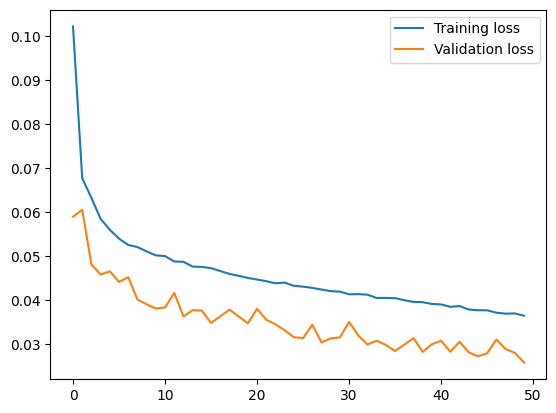

In [116]:
plt.plot(history_BiLSTM_tuned.history['loss'], label='Training loss')
plt.plot(history_BiLSTM_tuned.history['val_loss'], label='Validation loss')
plt.legend()

In [117]:
pred_BiLSTM_tuned = model_BiLSTM_tuned.predict(X_test)

106/106 [==============================] - 4s 12ms/step


In [118]:
prediction_copies = np.repeat(pred_BiLSTM_tuned, df_default.shape[1], axis=-1)
pred_BiLSTM_tuned_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

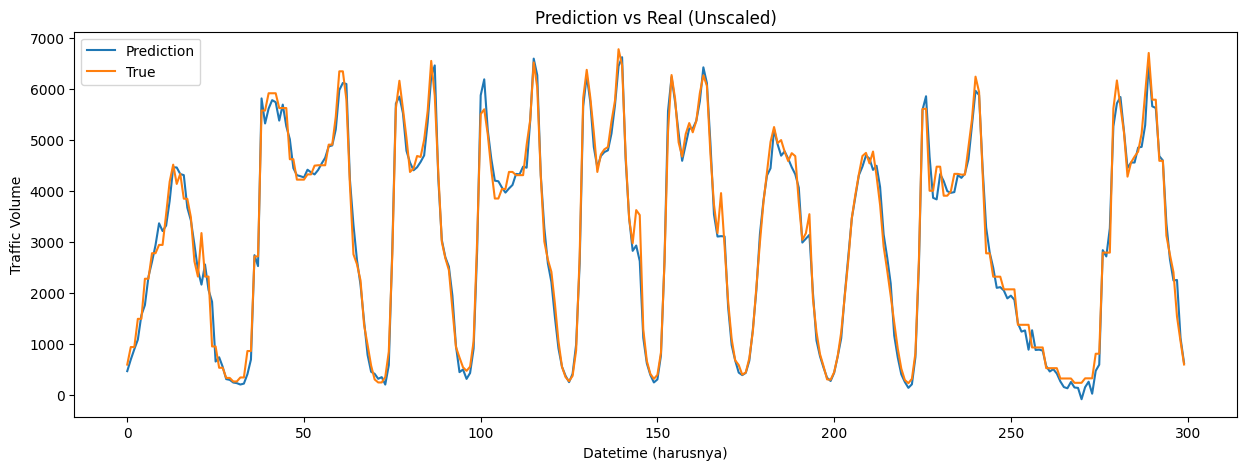

In [119]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_BiLSTM_tuned_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [122]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import math


mae_BiLSTM_tuned = mean_absolute_error(pred_BiLSTM_tuned_unscaled, true_value)
rmse_BiLSTM_tuned = math.sqrt(mean_squared_error(pred_BiLSTM_tuned_unscaled, true_value))
mape_BiLSTM_tuned = mean_absolute_percentage_error(pred_BiLSTM_tuned_unscaled, true_value)

print(f'MAE : {mae_BiLSTM_tuned}')
print(f'RMSE: {rmse_BiLSTM_tuned}')
print(f'MAPE: {mape_BiLSTM_tuned}')
print(f'Time: {training_time_BiLSTM_tuned}')

MAE : 187.94392841518933
RMSE: 321.83942342610186
MAPE: 0.11530086454009413
Time: 1506.1240010261536


In [77]:
# model_BiLSTM_tuned.save('model/Tuned/BiLSTM_default.h5')

## GRU

In [123]:
from tensorflow.keras.layers import GRU, Dropout, Dense

In [124]:
from kerastuner.tuners import RandomSearch

def build_model_GRU(hp):
    model = Sequential()
    model.add(GRU(hp.Int('units_layer1', min_value=32, max_value=128, step=32),
                   activation=hp.Choice('activation', values=['relu', 'tanh']),
                   input_shape=(trainX.shape[1], trainX.shape[2]),
                   return_sequences=True))
    model.add(GRU(hp.Int('units_layer2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='mae')
    return model

In [125]:
tuner_GRU = RandomSearch(
    build_model_GRU,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='model/GRU_default',
    project_name='GRU_tuning_default'
)

tuner_GRU.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Reloading Tuner from model/GRU_default\GRU_tuning_default\tuner0.json


In [126]:
# Get the optimal hyperparameters
best_hps_GRU = tuner_GRU.get_best_hyperparameters(num_trials=1)[0]

for param in best_hps_GRU.values:
    print(param, best_hps_GRU.get(param))

units_layer1 64
activation tanh
units_layer2 32
dropout 0.30000000000000004
optimizer adam


In [127]:
# Build the model with the best hyperparameters
model_GRU_tuned = tuner_GRU.hypermodel.build(best_hps_GRU)
start_time = time.time()
history_GRU_tuned = model_GRU_tuned.fit(trainX, trainY, epochs=50, validation_data=(X_test, y_test))
end_time = time.time()
training_time_GRU_tuned = end_time - start_time

Epoch 1/50
1054/1054 [==============================] - 21s 15ms/step - loss: 0.1196 - val_loss: 0.0645
Epoch 2/50
1054/1054 [==============================] - 15s 15ms/step - loss: 0.0834 - val_loss: 0.0578
Epoch 3/50
1054/1054 [==============================] - 15s 14ms/step - loss: 0.0765 - val_loss: 0.0498
Epoch 4/50
1054/1054 [==============================] - 15s 14ms/step - loss: 0.0716 - val_loss: 0.0468
Epoch 5/50
1054/1054 [==============================] - 14s 14ms/step - loss: 0.0677 - val_loss: 0.0437
Epoch 6/50
1054/1054 [==============================] - 14s 13ms/step - loss: 0.0658 - val_loss: 0.0454
Epoch 7/50
1054/1054 [==============================] - 13s 12ms/step - loss: 0.0641 - val_loss: 0.0449
Epoch 8/50
1054/1054 [==============================] - 13s 12ms/step - loss: 0.0635 - val_loss: 0.0433
Epoch 9/50
1054/1054 [==============================] - 13s 12ms/step - loss: 0.0624 - val_loss: 0.0393
Epoch 10/50
1054/1054 [==============================] - 13s 12m

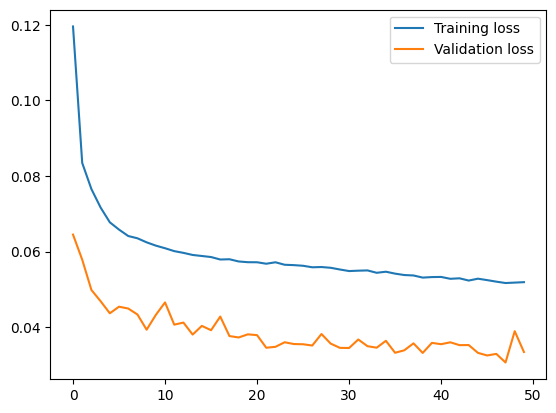

In [128]:
plt.plot(history_GRU_tuned.history['loss'], label='Training loss')
plt.plot(history_GRU_tuned.history['val_loss'], label='Validation loss')
plt.legend()

In [129]:
pred_GRU_tuned = model_GRU_tuned.predict(X_test)

106/106 [==============================] - 1s 5ms/step


In [130]:
prediction_copies = np.repeat(pred_GRU_tuned, df_default.shape[1], axis=-1)
pred_GRU_tuned_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

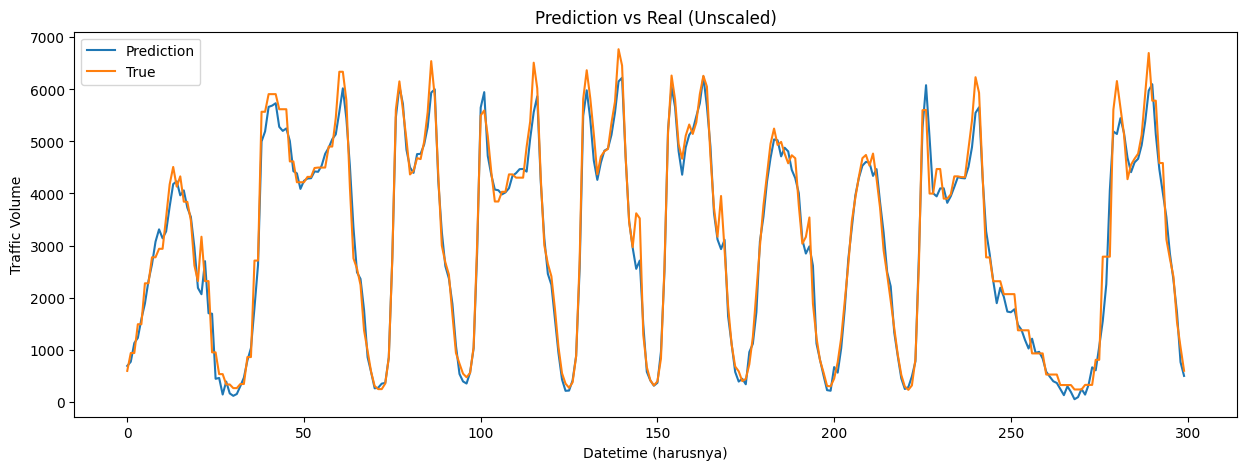

In [131]:
# Plot Prediction vs Real Data
plt.figure(figsize=(15,5))
plt.plot(pred_GRU_tuned_unscaled[:300])
plt.plot(true_value[:300])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [132]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import math


mae_GRU_tuned = mean_absolute_error(pred_GRU_tuned_unscaled, true_value)
rmse_GRU_tuned = math.sqrt(mean_squared_error(pred_GRU_tuned_unscaled, true_value))
mape_GRU_tuned = mean_absolute_percentage_error(pred_GRU_tuned_unscaled, true_value)

print(f'MAE : {mae_GRU_tuned}')
print(f'RMSE: {rmse_GRU_tuned}')
print(f'MAPE: {mape_GRU_tuned}')
print(f'Time: {training_time_GRU_tuned}')

MAE : 243.1307359656417
RMSE: 383.39566213740767
MAPE: 0.13642810459920035
Time: 667.512852191925


In [89]:
# model_GRU_tuned.save('model/Tuned/GRU_default.h5')

c:\Users\Naufal\anaconda3\envs\XAI\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Comparison

In [154]:
data_LSTM = {'Model': 'LSTM', 'MAE': mae_LSTM, 'RMSE': rmse_LSTM, 'MAPE': mape_LSTM, 'Time': training_time_LSTM}
data_BiLSTM = {'Model': 'BiLSTM', 'MAE': mae_BiLSTM, 'RMSE': rmse_BiLSTM, 'MAPE': mape_BiLSTM, 'Time': training_time_BiLSTM}
data_GRU = {'Model': 'GRU', 'MAE': mae_GRU, 'RMSE': rmse_GRU, 'MAPE': mape_GRU, 'Time': training_time_GRU}
data_LSTM_tuned = {'Model': 'LSTM_tuned', 'MAE': mae_LSTM_tuned, 'RMSE': rmse_LSTM_tuned, 'MAPE': mape_LSTM_tuned, 'Time': training_time_LSTM_tuned}
data_BiLSTM_tuned = {'Model': 'BiLSTM_tuned', 'MAE': mae_BiLSTM_tuned, 'RMSE': rmse_BiLSTM_tuned, 'MAPE': mape_BiLSTM_tuned, 'Time': training_time_BiLSTM_tuned}
data_GRU_tuned = {'Model': 'GRU_tuned', 'MAE': mae_GRU_tuned, 'RMSE': rmse_GRU_tuned, 'MAPE': mape_GRU_tuned, 'Time': training_time_GRU_tuned}

df_metrics = pd.DataFrame([data_LSTM, data_BiLSTM, data_GRU, data_LSTM_tuned, data_BiLSTM_tuned, data_GRU_tuned])

In [155]:
df_metrics

,Model,MAE,RMSE,MAPE,Time
0,LSTM,310.181407,501.883458,0.147912,1037.135295
1,BiLSTM,289.198055,469.452418,0.138226,1450.748215
2,GRU,355.201314,528.738001,0.162768,1008.032148
3,LSTM_tuned,229.945358,379.132198,0.120601,837.857211
4,BiLSTM_tuned,187.943928,321.839423,0.115301,1506.124001
5,GRU_tuned,243.130736,383.395662,0.136428,667.512852


In [159]:
# df_metrics.to_csv('outputs/new/metric_default.csv')

In [158]:
# model_LSTM.save('outputs/new_default/model/LSTM_default.h5')
# model_BiLSTM.save('outputs/new_default/model/BiLSTM_default.h5')
# model_GRU.save('outputs/new_default/model/GRU_default.h5')
# model_LSTM_tuned.save('outputs/new_default/model/LSTM_tuned_default.h5')
# model_BiLSTM_tuned.save('outputs/new_default/model/BiLSTM_tuned_default.h5')
# model_GRU_tuned.save('outputs/new_default/model/GRU_tuned_default.h5')

c:\Users\Naufal\anaconda3\envs\XAI\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
